This notebook discusses the Energy Star scores of buildings from different perspectives by examining the data provided by the City of Seattle's Building Energy Benchmarking and Reporting Program. The dataset summarizes the important features of the buildings in Seattle as well as their energy consumption and greenhouse gas emission information.

Let's start by the definition of the Energy Star score. The Energy Star score of a building is a way to asses the energy usage performance of a building by comparing it with similar buildings. It assigns a number to the building in between 0-100 based on its performance. A score of 0 would mean that the building performs the worst among the similar buildings registered to the program and a score of 100 would mean that the building is the best performer. Similarly, a score of 75 or higher means the building is a top performer and may be eligible for ENERGY STAR certification.

So far, so good. Let's look at the Energy Star scores of the buildings in the City of Seattle based on the function of the building and the neighborhood.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

#Let's load and show a few rows of our data
df2016 = pd.read_csv('./2016-building-energy-benchmarking.csv')
df2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


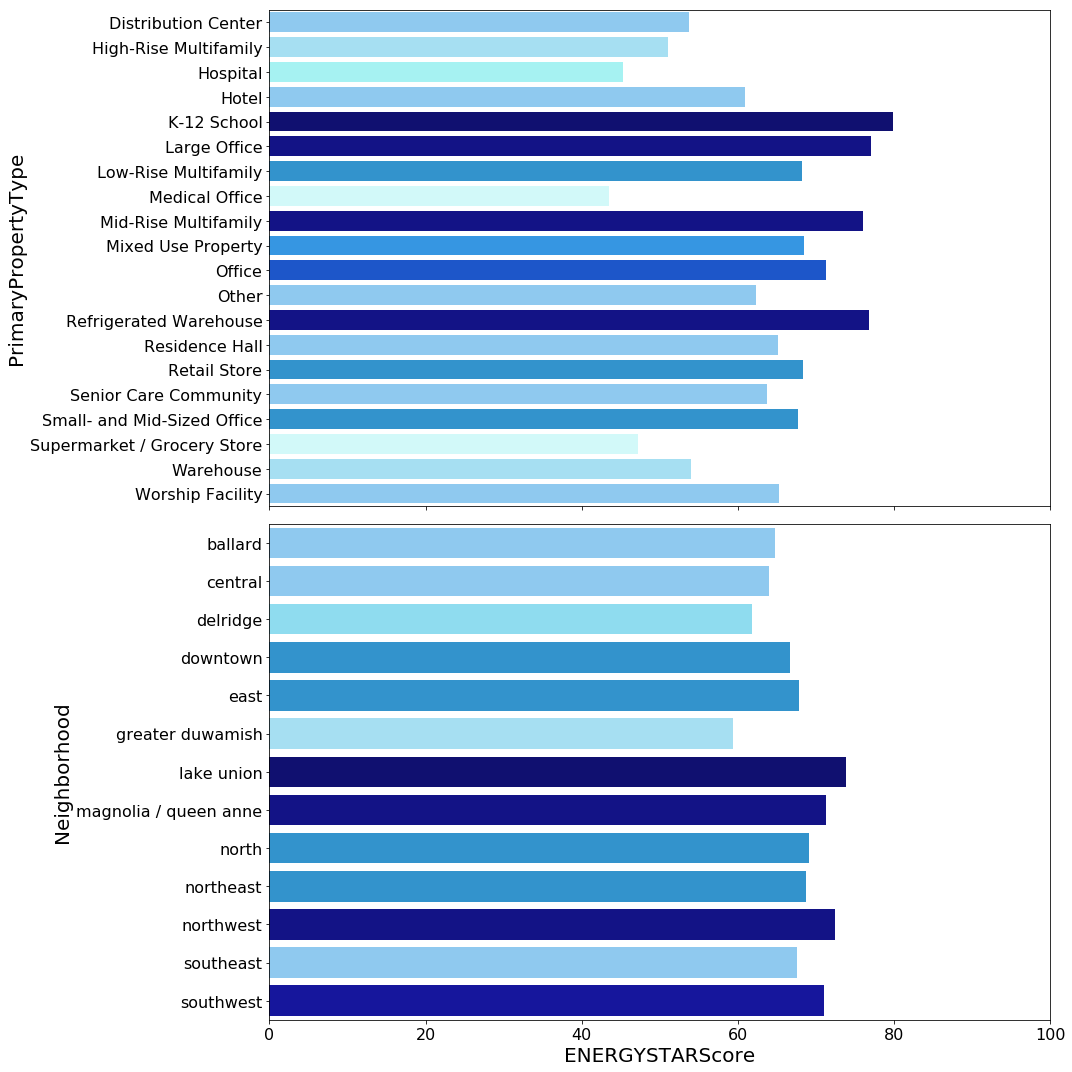

In [2]:
#A few of the Energy Star scores of the buildings are missing in the database. I did not try to impute 
#the missing scores. The purpose here is to show the general trends in Energy Star scores not to precisely
#predict something. Therefore, I simply removed the buildings with missing scores from the database 

df2016 = df2016.dropna(subset=['ENERGYSTARScore'])

# Now we can group the buildings based on their function and neighborhood and plot their energy stars
buildingTypeEnergyStar = df2016.groupby(['PrimaryPropertyType'])['ENERGYSTARScore'].mean().reset_index()
df2016['Neighborhood'] = map(lambda x: x.lower(), df2016['Neighborhood'])
neighborhoodEnergyStar = df2016.groupby(['Neighborhood'])['ENERGYSTARScore'].mean().reset_index()

f, axes = plt.subplots(2,1, sharex=True, figsize=(15,15))
color1 = [[0.5,0.8,1],[0.6,0.9,1],[0.6,1,1],[0.5,0.8,1],[0,0,0.5],[0,0,0.6],[0.1,0.6,0.9],
          [0.8,1,1],[0,0,0.6],[0.1,0.6,1],[0,0.3,0.9],[0.5,0.8,1],[0,0,0.6],[0.5,0.8,1],
          [0.1,0.6,0.9],[0.5,0.8,1],[0.1,0.6,0.9],[0.8,1,1],[0.6,0.9,1],[0.5,0.8,1]]

color2 = [[0.5,0.8,1],[0.5,0.8,1],[0.5,0.9,1],[0.1,0.6,0.9],[0.1,0.6,0.9],[0.6,0.9,1],[0,0,0.5],
          [0,0,0.6],[0.1,0.6,0.9],[0.1,0.6,0.9],[0,0,0.6],[0.5,0.8,1],[0,0,0.7]]

ax1 = sns.barplot(y = buildingTypeEnergyStar['PrimaryPropertyType'], x = buildingTypeEnergyStar['ENERGYSTARScore'],
            ax=axes[0], palette=color1)
ax2 = sns.barplot(y = neighborhoodEnergyStar['Neighborhood'], x = neighborhoodEnergyStar['ENERGYSTARScore'], 
            ax=axes[1], palette=color2)

ax1.yaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
ax2.xaxis.label.set_size(20)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.set_xlabel('')

ax1.set_xlim([0,100])
ax2.set_xlim([0,100])
plt.tight_layout()
plt.show()

When grouped by function, most of the buildings in Seattle are above the median Energy Star score with the exceptions of medical offices, hospitals and grocery stores. Particularly, K-12 schools, large offices, refrigerated warehouses and mid-rise multifamily buildings have a score of higher than 75 which makes them eligible for Energy Star certification in 2016.

When we group the buildings by neighborhood, Lake Union, Magnolia/Queen Anne, Northwest and Southwest neighborhoods have an average score of above 70. On the other hand, buildings in the Greater Duwamish neighborhood have the lowest average score of slightly below 60. This might be because one of the largest hospital campuses in Seattle, Virginia Mason Medical Center, is located in this neighborhood.

One of the most important questions to ask at this point is; how good of a representaion of these Energy Star scores when we consider the conversion of a unit of available energy recouses to the useful energy we use in our daily lives? To answer this question, we need to understand the way the Energy Star score is calculated.

There are two forms of energy use that are often discussed when talking about energy consumption of buildings. Source energy represents the total amount of raw fuel that is required to operate the building. It incorporates all transmission, delivery, and production losses. Site energy, on the other hand, is the amount of heat and electricity consumed by a building as reflected in the utility bills. Site energy may be delivered to the building as natural gas or fuel oil (primary energy) to be used in onsite energy generation or it can be delivered as heat or electricity (secondary energy) to be directly used in the building. The total energy consumption of a building can be composed of different proportions of primary and secondary energy sources. Therefore, to assess the relative efficiencies of buildings with varying proportions of primary and secondary energy consumption, it is necessary to convert these two types of energy sources into equivalent units of raw fuel consumed to generate one unit of energy consumed on-site. To achieve this equivalency, Environmental Protection Agency (EPA) converts all forms of energy to source energy.

Now, we can come back to the question of how is the Energy Star score calculated? EPA uses the data collected by Commercial Buildings Energy Consumption Survey (CBECS) as reference and analyze a group of similar buildings. The analysis involves filtering the data and extracting the important features that affect energy consumption. These features can be the number of MRI machines and the number of staffed beds for hospitals or the weekly operating hours and the number of workers for grocery stores. These features obtained from the reference data are then used to predict the source energy consumption of the buildings registered to the Energy Star program. On the other hand, the actual source energy consumption of the building is calculated by multiplying each site energy type with their corresponding site-to-source conversion constants. For example, for electricity, the site-to-source energy converison constant is 2.8 and for natural gas, it is 1.05. Finally, the predicted source energy consumption is compared with the actual source energy consumption and a score is assigned to each building in between 0-100. 

This sounds fair at first glance as it compares similar buildings with each other and the overall score tells the performance of your building compared to the other registered buildings in the nation. However, this definition is highly relative and does not say much about if the building is actually efficient based on absolute measures. In other words, if all similar buildings perform poorly in the database, being above the median does not mean your building is actually an energy efficient one. To understand the actual impact of a building to the nature, we need to relax the constant multipliers per fuel type assumption in the calculation of the site-to-source energy conversion. This would help us understand the inefficiencies resulting outside the control of the owner of the building, such as; energy production inefficiencies or the problematic utility providers.

Now, to get around this relative definition, let's define a source-to-site loss ratio and regroup the buildings based on their function and neighborhood.

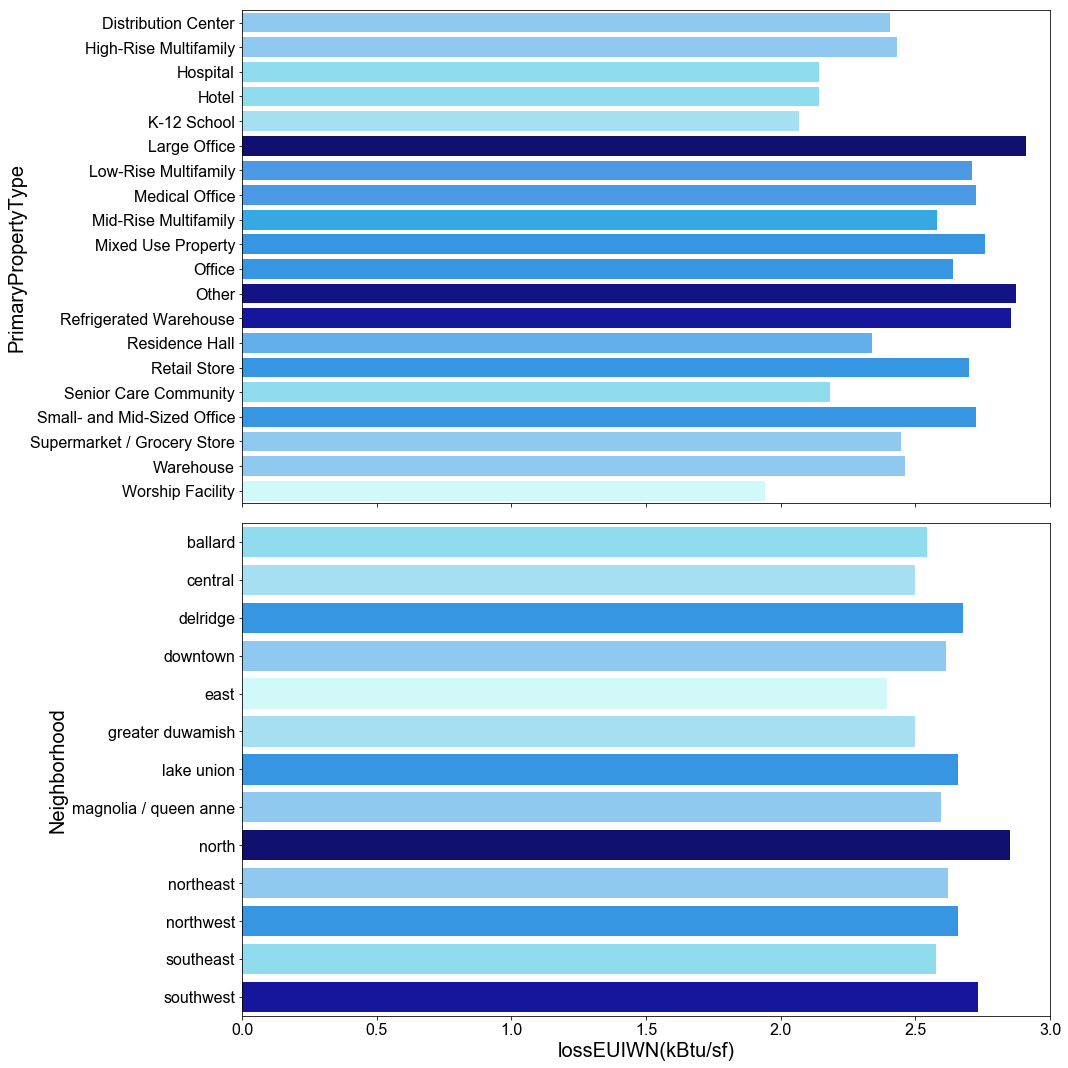

In [3]:
#Here is the definition of the source-to-site loss ratio
df2016 = df2016[df2016['SourceEUIWN(kBtu/sf)'] > 0]
df2016 = df2016[df2016['SiteEUIWN(kBtu/sf)'] > 0]
df2016['lossEUIWN(kBtu/sf)'] = df2016['SourceEUIWN(kBtu/sf)'] / df2016['SiteEUIWN(kBtu/sf)']

for i, row in df2016.iterrows():
    if df2016['SiteEUIWN(kBtu/sf)'][i] <= 0:
        df2016['lossEUIWN(kBtu/sf)'][i] = df2016['SourceEUI(kBtu/sf)'][i] / df2016['SiteEUI(kBtu/sf)'][i]

buildingTypeLoss = df2016.groupby(['PrimaryPropertyType'])['lossEUIWN(kBtu/sf)'].mean().reset_index()
neighborhoodLoss = df2016.groupby(['Neighborhood'])['lossEUIWN(kBtu/sf)'].mean().reset_index()

f, axes = plt.subplots(2, 1,sharex = True,figsize=(15,15))
sns.set(style="whitegrid")
color1 = [[0.5,0.8,1],[0.5,0.8,1],[0.5,0.9,1],[0.5,0.9,1],[0.6,0.9,1],[0,0,0.5],[0.2,0.6,1],
          [0.2,0.6,1],[0.1,0.7,1],[0.1,0.6,1],[0.1,0.6,1],[0,0,0.6],[0,0,0.7],
          [0.3,0.7,1],[0.1,0.6,1],[0.5,0.9,1],[0.1,0.6,1],[0.5,0.8,1],[0.5,0.8,1],[0.8,1,1]]

color2 = [[0.5,0.9,1],[0.6,0.9,1],[0.1,0.6,1],[0.5,0.8,1],[0.8,1,1],[0.6,0.9,1],
          [0.1,0.6,1],[0.5,0.8,1],[0,0,0.5],[0.5,0.8,1],[0.1,0.6,1],[0.5,0.9,1],[0,0,0.7]]

ax1 = sns.barplot(y = buildingTypeLoss['PrimaryPropertyType'], x = buildingTypeLoss['lossEUIWN(kBtu/sf)'],
            ax=axes[0], palette=color1)
ax2 = sns.barplot(y = neighborhoodLoss['Neighborhood'], x = neighborhoodLoss['lossEUIWN(kBtu/sf)'], 
            ax=axes[1], palette=color2)

ax1.yaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
ax2.xaxis.label.set_size(20)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.set_xlabel('')
ax1.set_xlim([0,3])
ax2.set_xlim([0,3])
plt.tight_layout()
plt.show()

The loss ratio tells us how many units of actual raw fuel is consumed to produce one unit of useful energy such as heat or electricity. Previously, we saw that the large offices and the refrigerated warehouses have an Energy Star score of 75 or higher. However, when we look at the actual raw fuel used to power these buildings, they use the most raw fuel resources. Similarly, Lake Union, Northwest and Southwest neighborhoods have a Energy Star score of above 70 but they have three of the top five highest loss ratios. So, the buildings in these neighborhoods perform better among their peers but on the other hand, consume the highest amount of raw fuel which is not very desirable from the environmental perspective.

To understand the reason behind this discrepancy, we need to separate the energy sources into their types. Following the previous analysis, let's group the buildings based on their function and neighborhood and look at the proportion of the types of fuels used in these buildings.

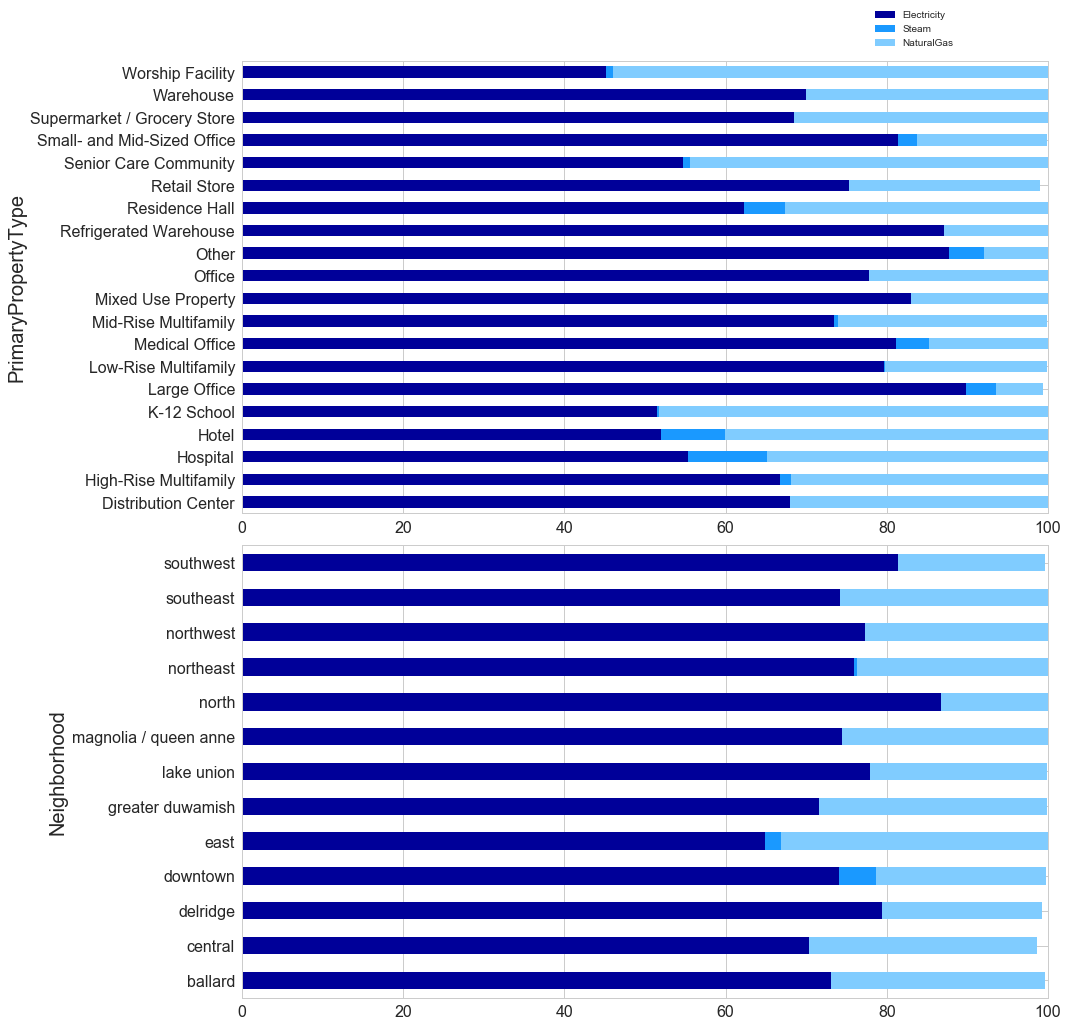

In [4]:
df2016['Electricity'] = df2016['Electricity(kBtu)']/df2016['SiteEnergyUse(kBtu)']*100
df2016['Steam'] = df2016['SteamUse(kBtu)']/df2016['SiteEnergyUse(kBtu)']*100
df2016['NaturalGas'] = df2016['NaturalGas(kBtu)']/df2016['SiteEnergyUse(kBtu)']*100

buildingTypeEnergyPercentage = df2016.groupby(['PrimaryPropertyType'])['Electricity','Steam',
                                          'NaturalGas'].mean().reset_index()
neighborhoodEnergyPercentage = df2016.groupby(['Neighborhood'])['Electricity','Steam',
                                          'NaturalGas'].mean().reset_index()

f, axes = plt.subplots(2, 1,figsize=(15,15))
colorStacked = [[0,0,0.6],[0.1,0.6,1],[0.5,0.8,1]]
neighborhoodEnergyPercentage = neighborhoodEnergyPercentage[['Electricity','Steam','NaturalGas']]
buildingTypeEnergyPercentage = buildingTypeEnergyPercentage[['Electricity','Steam','NaturalGas']]

ax1 = buildingTypeEnergyPercentage.set_index(buildingTypeLoss['PrimaryPropertyType']).plot.barh(stacked=True, 
                                            ax = axes[0], color=colorStacked)
ax2 = neighborhoodEnergyPercentage.set_index(neighborhoodLoss['Neighborhood']).plot.barh(stacked=True, 
                                            ax = axes[1], color=colorStacked)

ax1.yaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
ax2.xaxis.label.set_size(20)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax1.set_xlim([0,100])
ax2.set_xlim([0,100])
ax1.legend(loc = [0.78, 1.02])
ax2.get_legend().remove()
plt.tight_layout()
f.subplots_adjust(top=0.9)
plt.show()

When we look at the consumption of energy by type, we realize the fraction of electricity used by high loss ratio building types, such as, refrigerated warehouses and large offices are the highest among all types of buildings. Similarly, high loss ratio neighborhoods (North, Southwest, Delridge) use larger fraction of electricity as a source of energy instead of natural gas and steam. This observation interestingly breaks the general belief of electricity being "the most green energy source". In fact, the efficiency of an average electric heater can be above 95% but this does not consider the losses in production or transfer. In other words, when people talk about electricity being “clean power,” this typically fails to acknowledge the reality of source energy.

Still, this is not the end of the story and we need to consider the problem from the greenhouse gas emmissions point of view. To do this, let's look at what other features in our data correlate with the greenhouse gas emmisisons.

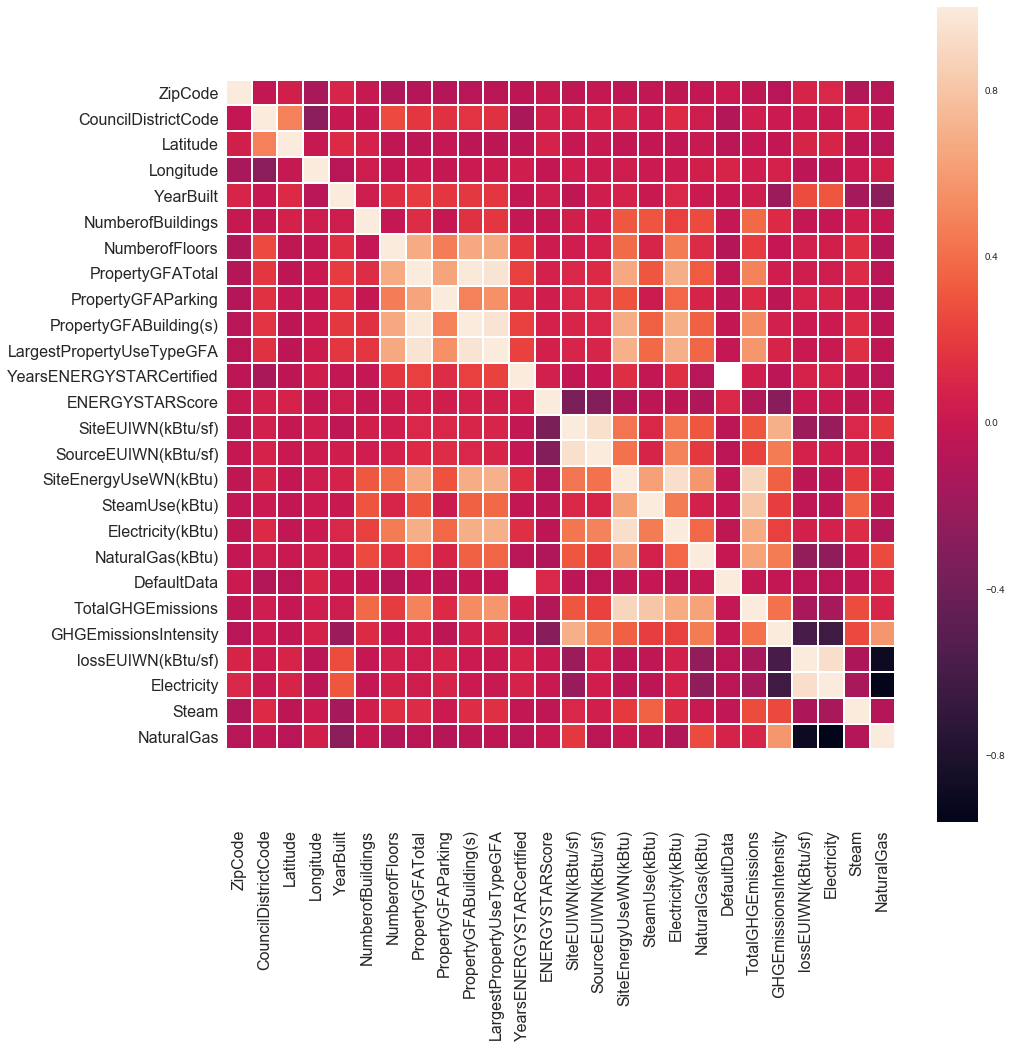

In [5]:
hmap = df2016.drop(['OSEBuildingID','DataYear','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
                 'SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','Electricity(kWh)',
                 'NaturalGas(therms)', 'Comments'], axis = 1)

corrmat = hmap.corr()

fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(corrmat, linewidth = 1, xticklabels=True, yticklabels=True)
ax.tick_params(labelsize=16)
plt.axis('equal')
plt.show()

It looks like greenhouse gas emmission intensity is negatively correlated with the electricity usage and positively correlated with the natural gas usage in the building. This might mislead us that electricity is "cleaner" than the natural gas as an energy source from the greenhouse gas emmissions point of view. 

However, this greenhouse gas emmission intensity plot does not take the gasses emmitted during the electricity production into consideration (data is based on the site energy). We do not know the actual raw fuel used to produce this electricity. It is highly possible that the greenhouse gas emmission is moved from your chimney to somewhere that you can not see it. So, we can not conclude that electricity is "greener" out of this data. It would only have been "greener" if the electricty came from renewable energy sources.

Greenhouse emmissions is also negatively correlated with the construction year of the building. Let's look at the emmission trends of the buildings constructed over the last 100 years.

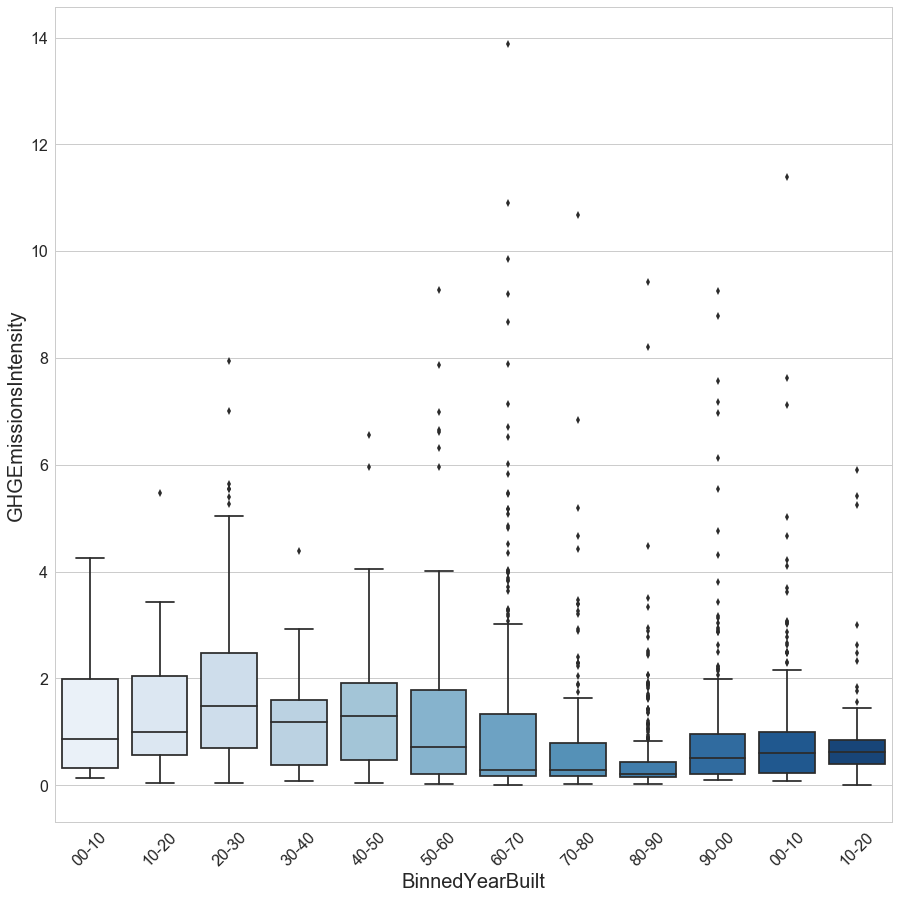

In [6]:
binsYearBuilt = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
df2016['BinnedYearBuilt'] = pd.cut(df2016['YearBuilt'], bins = binsYearBuilt)
CO2binnedYearBuilt = df2016.groupby(['BinnedYearBuilt'])['GHGEmissionsIntensity'].mean().reset_index()
CO2binnedPercentage = df2016.groupby(['BinnedYearBuilt'])['Electricity','Steam',
                                          'NaturalGas'].mean().reset_index()

xticklabels = ['00-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-00','00-10','10-20']
fig = plt.figure(figsize=(15,15))
ax = sns.boxplot(x="BinnedYearBuilt", y="GHGEmissionsIntensity", data=df2016, palette="Blues")
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params(labelsize=16)
ax.set_xticklabels(xticklabels, rotation = 45)
plt.show()

The bar plot shows the greenhouse gas emmission intensities in 20th century until 2016. As natural gas is the main source of greenhouse gas emmissions in our data, this plot shows a couple of interesting trends. We can speculate with the oil boom in the US in between 1900-1940, the primary energy source of the buildings built become natural gas as we see a peak in greenhouse gas emmissions in 1920-1930. After the boom, the emissions trend started to reverse and after 1970s, with the petroleum crisis, the natural gas was no longer used as a primary source for energy production.

Finally, let's look at a couple of pie charts to see how these political elements (oil boom and crisis) influence the types of fuels installed in newly built houses over different time periods.

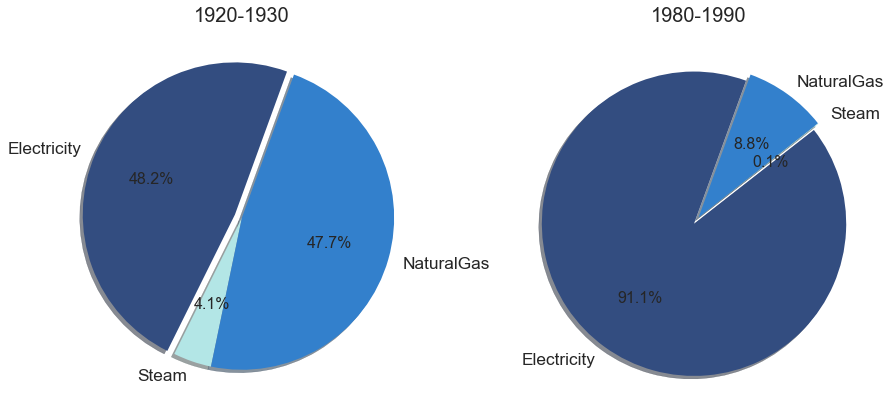

In [7]:
f, axes = plt.subplots(2, 1,figsize=(15,15))
labels = ['Electricity','Steam','NaturalGas']
sizes1 = [CO2binnedPercentage['Electricity'][2],CO2binnedPercentage['Steam'][2],
          CO2binnedPercentage['NaturalGas'][2]]
sizes2 = [CO2binnedPercentage['Electricity'][8],CO2binnedPercentage['Steam'][8],
          CO2binnedPercentage['NaturalGas'][8]]

explode = (0.05, 0, 0)
the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0], aspect=1)
patches1, texts1, autotexts1 = plt.pie(sizes1, explode = explode, labels=labels,colors=[[0.2,0.3,0.5],[0.7,0.9,0.9],[0.2,0.5,0.8]],
         autopct='%1.1f%%',textprops = {'fontsize':16}, shadow=True, startangle=70, radius = 1)
plt.title('1920-1930', fontsize=20)
for t in texts1:
    t.set_size('x-large')
plt.subplot(the_grid[1], aspect=1)
patches2, texts2, autotexts2 = plt.pie(sizes2, explode = explode, labels=labels,colors=[[0.2,0.3,0.5],[0.7,0.9,0.9],[0.2,0.5,0.8]],
         autopct='%1.1f%%', textprops = {'fontsize':16}, shadow=True, startangle=70, radius = 1)
for t in texts2:
    t.set_size('x-large')
plt.title('1980-1990', fontsize=20)
plt.show()

As we can see from the pie charts, petroleum crisis limited the fraction of houses built with natural gas installed as one of the primary sources of energy production to less than 10% in between 1980-1990.

In this notebook we explained the definition of Energy Star score of buildings. What we can deduce out of a building's Energy Star score and what we can NOT understand out of it. We defined the loss ratio to understand the actual raw fuel consumption of a building and showed that analyzing solely the Energy Star score or the loss ratio might result in wrong coclusions. We argued the impact of electricity to the nature as an energy source. Then, we discussed what features in our data correlate with the greenhouse gas emission intensities. And one more time highlighted that although it is not visible in our heatmap, if electricity is not coming from renewable resources, it is not necessarily a clean fuel. Finally, we connected the political elements with the energy policies in different time periods in the 20th century.